# Tarea NLP - Ricardo Bautista

## Desarrollo

Importamos librerías

In [91]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from unicodedata import normalize
import re
from itertools import chain
# from nltk.util import ngrams
from collections import Counter
from textblob import TextBlob
import nltk

Definimos funciones de normalización de texto y análisis de sentimiento

In [2]:
def normalize_text(text_data):
    # Quitar tildes y diacríticos
    text_data = normalize('NFKD', text_data).encode('ASCII', 'ignore').decode('utf-8')

    # Convertir a minúsculas
    text_data = text_data.lower()

    # Eliminar caracteres no alfanuméricos y puntuación
    text_data = re.sub(r'[^a-zA-Z0-9\s]', '', text_data)

    return text_data

In [3]:
# Función para calcular el sentimiento
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity

In [82]:
# Función para calcular subjetividad
def analyze_subjectivity(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.subjectivity

In [94]:
def sentiment(x):
    if x<0:
        return 'negativo'
    elif x==0:
        return 'neutral'
    else:
        return 'positivo'

Importamos los datos de Excel

In [4]:
df = pd.read_excel('NPS_DATOS DE ASEGURADOS_LAPROTECTORA.xlsx', sheet_name="NPS")

Abrimos el archivo de stopwords 

In [5]:
with open('Stopwords PE.txt', 'r', encoding='utf-8') as file:
    custom_stopwords = [line.strip() for line in file]

Stopwords de nltk

In [6]:
stopword_es = nltk.corpus.stopwords.words('spanish')


juntamos las 2 listas de stopwords

In [7]:
custom_stopwords = custom_stopwords +stopword_es

Filtramos la base por solo detractores

In [8]:
df['NPS'].unique()

array(['PROMOTOR', 'PASIVO', 'DETRACTOR'], dtype=object)

In [9]:
df_detractores = df[df['NPS']=='DETRACTOR']

Tomando el texto de los comentarios totales

In [10]:
text_data = df_detractores["NPS total Comentarios"].astype(str).str.cat(sep=' ')

Normalizando el texto

In [11]:
normalized_text = normalize_text(text_data)

Tokenizando y filtrando stopwords

In [12]:
nlp = spacy.load("es_core_news_sm")
doc = nlp(normalized_text)
filtered_tokens = [token.text for token in doc if token.text.lower() not in custom_stopwords]
filtered_text = ' '.join(filtered_tokens)

Se filtran los stopwords y se obtienen los lemas

In [13]:
filtered_lemmas = [token.lemma_ for token in doc if token.lemma_.lower() not in custom_stopwords]

Se unen los lemas para generar el texto procesado

In [14]:
processed_text = ' '.join(filtered_lemmas)

Se genera el WordCloud

In [15]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(filtered_text)

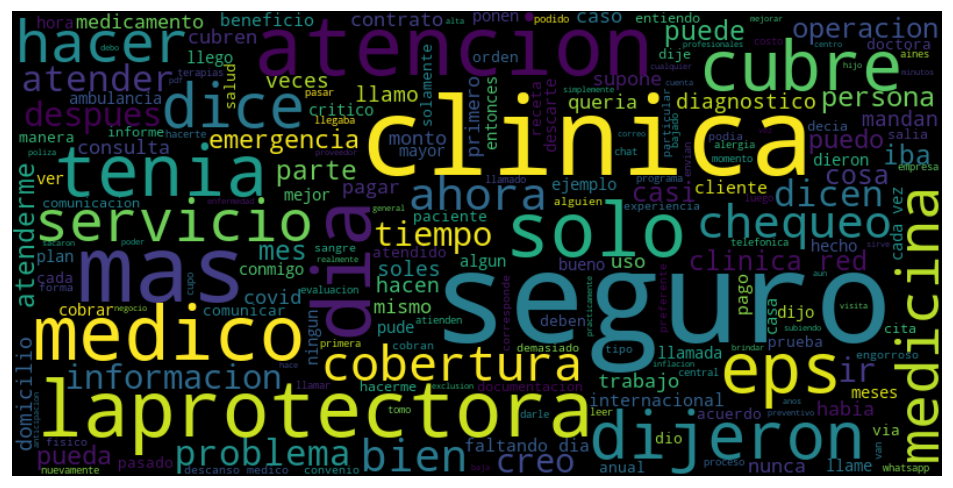

In [16]:
plt.figure(figsize=(10, 7), dpi=120)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

Cantidad de registros de detractores

In [17]:
print("Cantidad de registros:", df_detractores.shape[0])

Cantidad de registros: 44


Conteo de palabras

In [18]:
word_count = Counter(filtered_lemmas)

Se crea un DataFrame con el conteo de palabras

In [19]:
df_word_count = pd.DataFrame(list(word_count.items()), columns=['Palabra', 'Conteo'])

Se exporta el DataFrame

In [20]:
df_word_count.to_excel('conteo_palabras_detractores.xlsx', index=False)

Se generan bigramas, trigramas y n-gramas

In [21]:
bigrams = list(nltk.ngrams(filtered_lemmas, 2))
trigrams = list(nltk.ngrams(filtered_lemmas, 3))
n_value = 4
ngrams_result = ngrams_result = list(nltk.ngrams(filtered_lemmas, n_value))

Se muestran los bigramas, trigramas y 4-gramas

In [22]:
print("Bigramas:", bigrams)
print("Trigramas:", trigrams)
print(f"{n_value}-gramas:", ngrams_result)

Bigramas: [('atencion', 'telefonico'), ('telefonico', 'bien'), ('bien', 'cierto'), ('cierto', 'poder'), ('poder', 'contactarme'), ('contactarme', 'central'), ('central', 'emergencia'), ('emergencia', 'despuar'), ('despuar', 'hacer'), ('hacer', 'servicio'), ('servicio', 'haber'), ('haber', 'falencia'), ('falencia', 'servicio'), ('servicio', 'rapido'), ('rapido', 'bien'), ('bien', 'cierto'), ('cierto', 'poder'), ('poder', 'problema'), ('problema', 'salud'), ('salud', 'creer'), ('creer', 'medico'), ('medico', 'primero'), ('primero', 'tomartar'), ('tomartar', 'llamado'), ('llamado', 'ver'), ('ver', 'paciente'), ('paciente', 'critico'), ('critico', 'critico'), ('critico', 'acuerdo'), ('acuerdo', 'determinar'), ('determinar', 'medico'), ('medico', 'ir'), ('ir', 'comunicar'), ('comunicar', 'llamado'), ('llamado', 'poder'), ('poder', 'pasar'), ('pasar', 'hora'), ('hora', 'hora'), ('hora', 'central'), ('central', 'medico'), ('medico', 'internista'), ('internista', 'poder'), ('poder', 'tomar'), 

Crear un DataFrame con los bigramas, trigramas y 4-gramas y exportar a Excel

In [23]:
 
df_ngrams = pd.DataFrame.from_dict({
    'Bigramas': bigrams,
    'Trigramas': trigrams,
    f'{n_value}-gramas': ngrams_result
}, orient='index')

df_ngrams = df_ngrams.transpose()

In [24]:
df_ngrams.to_excel('ngrams_resultados_detractores.xlsx', index=False)

Se obtiene el texto de la columna seleccionada

In [25]:
comments_promotores = df_detractores['NPS total Comentarios'].astype(str)

Se aplica la función de análisis de sentimientos a cada comentario

In [26]:
df_detractores['Sentimiento'] = comments_promotores.apply(analyze_sentiment)

C:\Users\Ricar\AppData\Local\Temp\ipykernel_25068\2535390194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detractores['Sentimiento'] = comments_promotores.apply(analyze_sentiment)


Se aplica la función de análisis de subjetividad a cada comentario

In [84]:
df_detractores['Subjetividad'] = comments_promotores.apply(analyze_subjectivity)

In [27]:
# Se calcula la puntuación total
puntuacion_total = df_detractores['Sentimiento'].sum()
# Se calcula la polaridad promedio
polaridad_promedio = df_detractores['Sentimiento'].mean()

polaridad promedio

In [28]:
print("Polaridad Promedio:", polaridad_promedio)

Polaridad Promedio: -0.0020833333333333355


Se agrega la columna con la polaridad total y promedio total

In [29]:

df_detractores['Polaridad Total'] = puntuacion_total 
df_detractores['Polaridad Promedio'] = polaridad_promedio

C:\Users\Ricar\AppData\Local\Temp\ipykernel_25068\816099029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detractores['Polaridad Total'] = puntuacion_total
C:\Users\Ricar\AppData\Local\Temp\ipykernel_25068\816099029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detractores['Polaridad Promedio'] = polaridad_promedio


Se exporta a excel

In [30]:
df_detractores.to_excel('sentimientos_puntuacion_detractores.xlsx', index=False)

## Análisis y Conclusiones

Tomando en cuenta que solo se ha filtrado por detractores: es decir, Clientes insatisfechos y en riesgo de no recomendar. Es esperable que los comentarios sean negativos o de quejas. Esto nos puede servir para reconocer qué fallas u oportunidades de mejoras hay en compañía aseguradora "La Protectora".

Asimismo, viendo la frecuencia en la que es mencionada una molestia podemos establecer qué o cuáles deben tomar más prioridad.

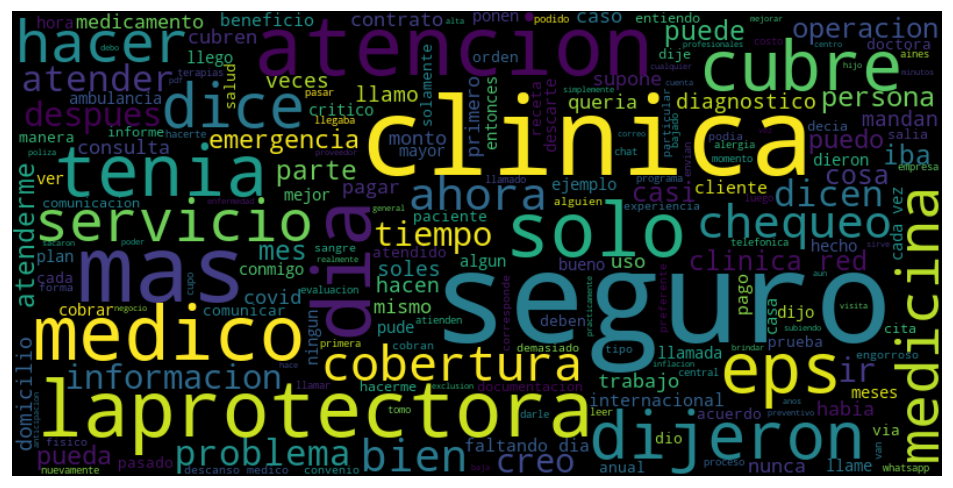

In [31]:
#Se genera el WordCloud
plt.figure(figsize=(10, 7), dpi=120)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'haber'),
  Text(1, 0, 'seguro'),
  Text(2, 0, 'decir'),
  Text(3, 0, 'ir'),
  Text(4, 0, 'clinica'),
  Text(5, 0, 'poder'),
  Text(6, 0, 'hacer'),
  Text(7, 0, 'mas'),
  Text(8, 0, 'dia'),
  Text(9, 0, 'medico'),
  Text(10, 0, 'cubrir'),
  Text(11, 0, 'atencion'),
  Text(12, 0, 'atender'),
  Text(13, 0, 'solo'),
  Text(14, 0, 'llamar')])

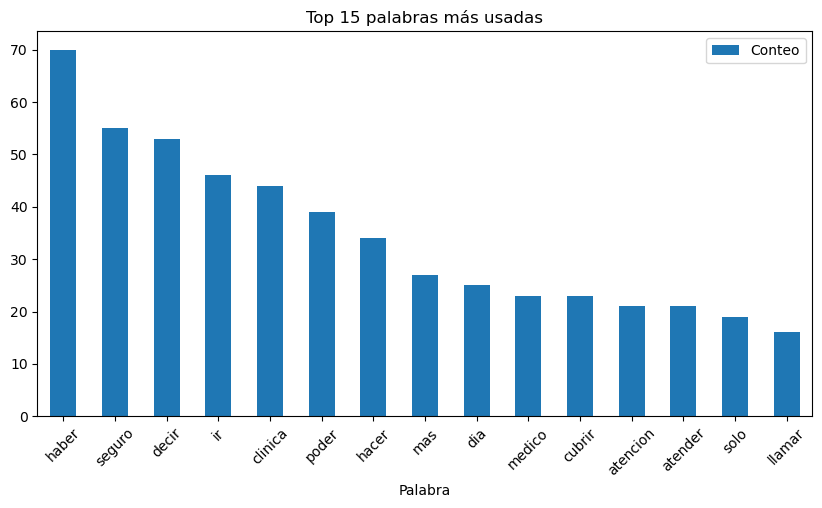

In [67]:
#Se genera el Gráfico
plt.rcParams["figure.figsize"] = (10,5)
df_word_count.sort_values(by='Conteo', ascending=False).head(15).plot(kind='bar',x ='Palabra')
plt.title('Top 15 palabras más usadas')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(ir, clinica)'),
  Text(1, 0, '(poder, atender)'),
  Text(2, 0, '(clinica, red)'),
  Text(3, 0, '(medico, domicilio)'),
  Text(4, 0, '(faltar, dia)'),
  Text(5, 0, '(dia, operacion)'),
  Text(6, 0, '(cada, vez)'),
  Text(7, 0, '(clinica, decir)'),
  Text(8, 0, '(decir, cubrir)'),
  Text(9, 0, '(cubrir, seguro)')])

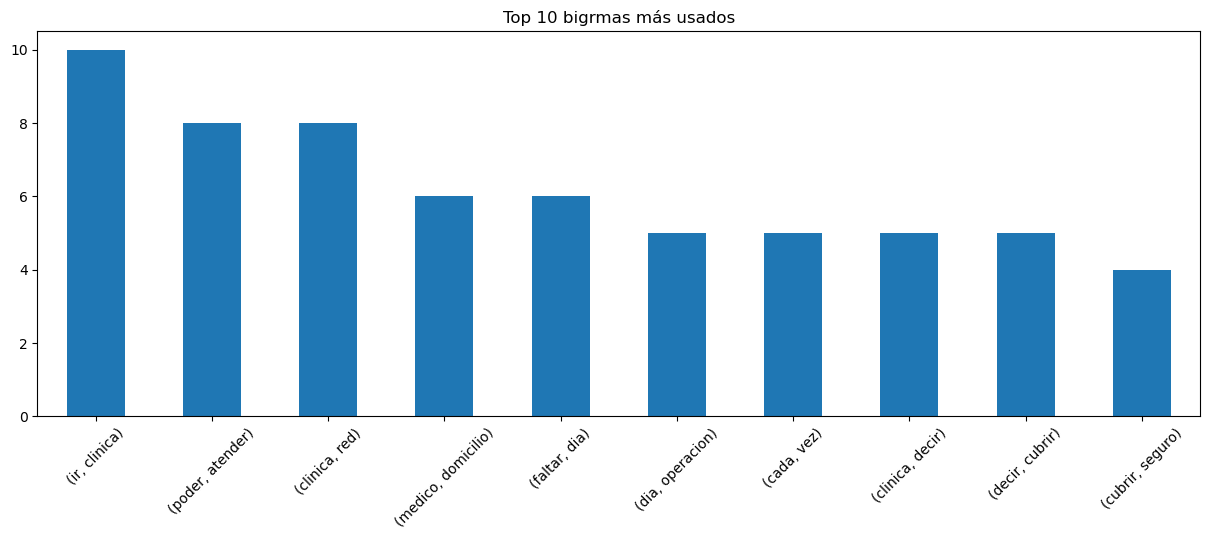

In [73]:
#Se genera el Gráfico
plt.rcParams["figure.figsize"] = (15,5)
df_ngrams['Bigramas'].value_counts().head(10).plot(kind='bar',x ='Palabra')
plt.title('Top 10 bigrmas más usados')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(faltar, dia, operacion)'),
  Text(1, 0, '(dia, operacion, decir)'),
  Text(2, 0, '(ir, clinica, decir)'),
  Text(3, 0, '(informe, mismo, medico)'),
  Text(4, 0, '(atencion, mas, personalizado)'),
  Text(5, 0, '(operacion, decir, cubrir)'),
  Text(6, 0, '(cliente, buscar, dar él)'),
  Text(7, 0, '(sangre, orina, fisico)'),
  Text(8, 0, '(visita, medico, domicilio)'),
  Text(9, 0, '(ir, hacer, documentacion)')])

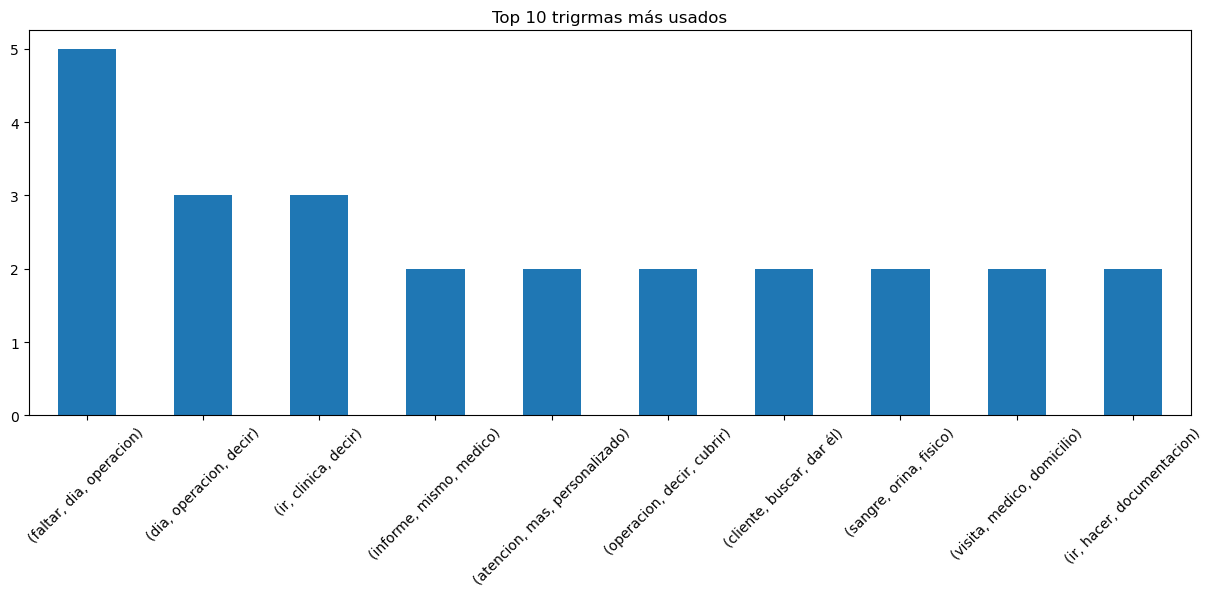

In [74]:
#Se genera el Gráfico
plt.rcParams["figure.figsize"] = (15,5)
df_ngrams['Trigramas'].value_counts().head(10).plot(kind='bar',x ='Palabra')
plt.title('Top 10 trigrmas más usados')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(faltar, dia, operacion, decir)'),
  Text(1, 0, '(teniar, orden, descarte, covid)'),
  Text(2, 0, '(dia, operacion, decir, cubrir)'),
  Text(3, 0, '(atencion, telefonico, bien, cierto)'),
  Text(4, 0, '(dar él, respuesta, cliente, buscar)'),
  Text(5, 0, '(respuesta, cliente, buscar, dar él)'),
  Text(6, 0, '(cliente, buscar, dar él, solucion)'),
  Text(7, 0, '(buscar, dar él, solucion, todavio)'),
  Text(8, 0, '(dar él, solucion, todavio, haber)'),
  Text(9, 0, '(solucion, todavio, haber, hacer)')])

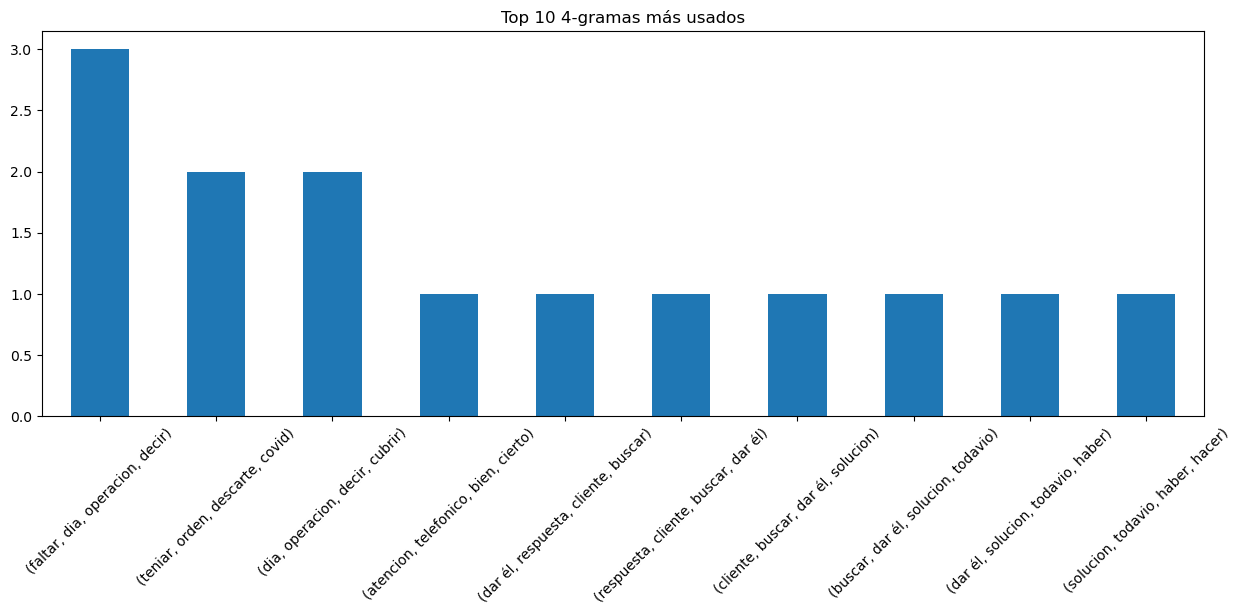

In [77]:
#Se genera el Gráfico
plt.rcParams["figure.figsize"] = (15,5)
df_ngrams['4-gramas'].value_counts().head(10).plot(kind='bar',x ='Palabra')
plt.title('Top 10 4-gramas más usados')
plt.xticks(rotation=45)

Al analizar el conteo de palabras destacan las palabras seguro, ir, clinica, hacer, más y medico. Esto, acompañado con los bigramas, trigramas y 4-gramas, vemos que toman un contexto entre los más dichos.

Se puede apreciar que, entre los detractores, se habla mucho sobre:
- Capacidad de poder ir a la clínica
- Respecto a cuántos días faltan para una operación o decir qué día
- La atención de los médicos a domicilio
- Lo que cubre el seguro
- Que los informes sean dados por el mismo médico
- Una atención más personalizada

In [36]:
puntuacion_total #Ver puntuación total

-0.09166666666666676

In [37]:
polaridad_promedio #Ver polaridad promedio

-0.0020833333333333355

Text(0.5, 1.0, 'Distribución del Score de Sentimiento')

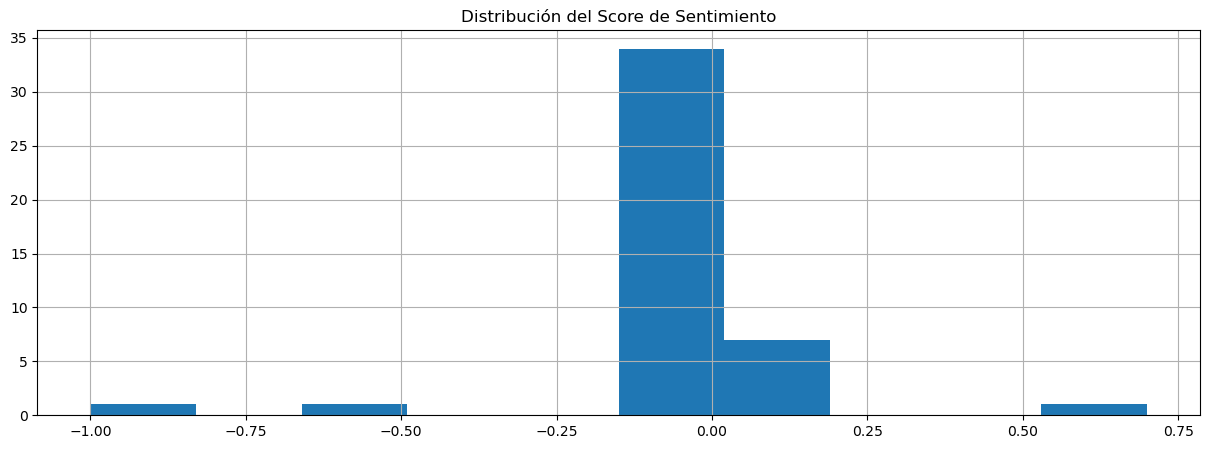

In [79]:
#Se genera el histograma
df_detractores['Sentimiento'].hist()
plt.title('Distribución del Score de Sentimiento')

<AxesSubplot:xlabel='Sentimiento'>

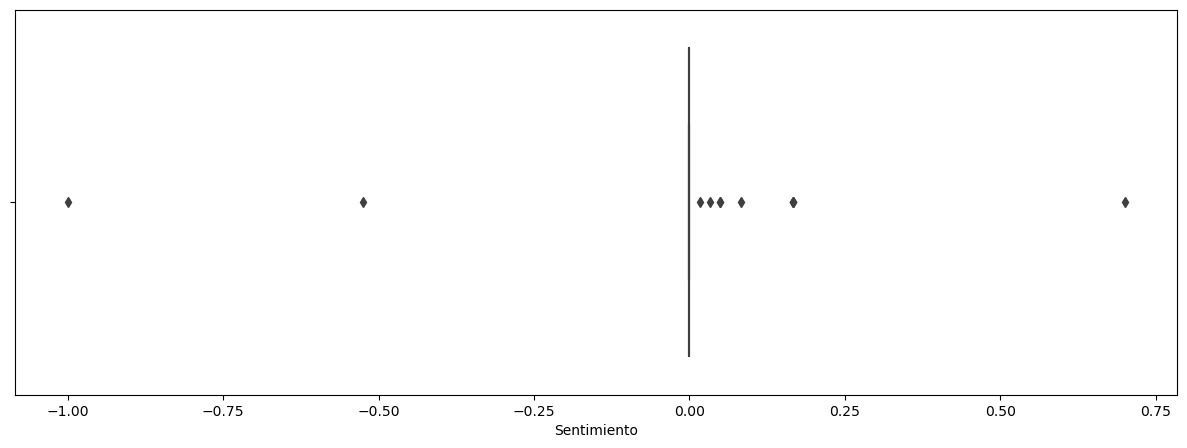

In [93]:
#Se genera el boxplot
sns.boxplot(x=df_detractores['Sentimiento'])

In [98]:
df_detractores['Polaridad']=df_detractores['Sentimiento'].map(lambda x: sentiment(x)) #Se clasifica por sentimiento

<AxesSubplot:xlabel='Polaridad', ylabel='count'>

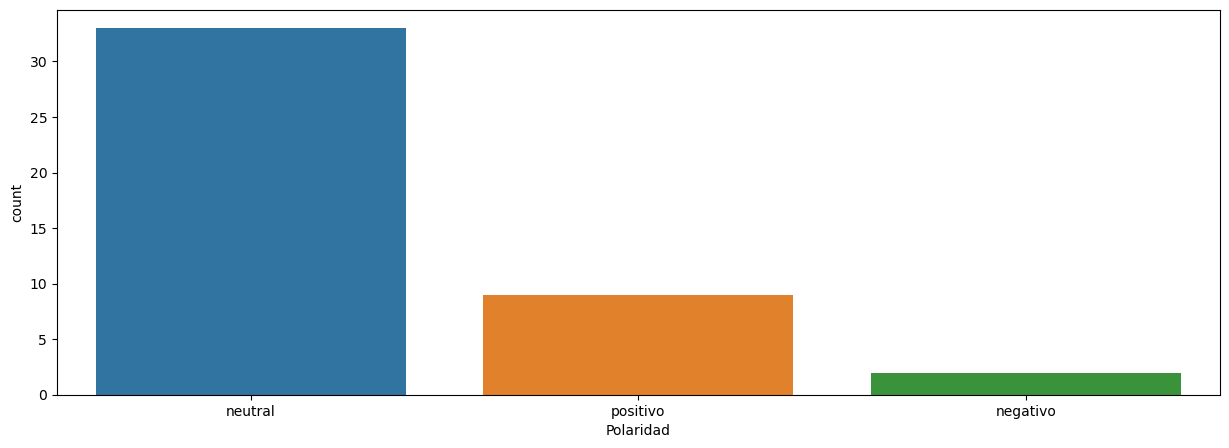

In [101]:
#Se genera el gráfico
sns.countplot(x=df_detractores['Polaridad'])

Respecto a la puntuación del análisis de sentimiento, se puede apreciar que los scores se tienden a centrar en 0 y ligeramente a la derecha (positivo).

Esto nos indica que la mayoría de comentarios son neutrales seguidos de positivos

Text(0.5, 1.0, 'Distribución del Score de Subjetividad')

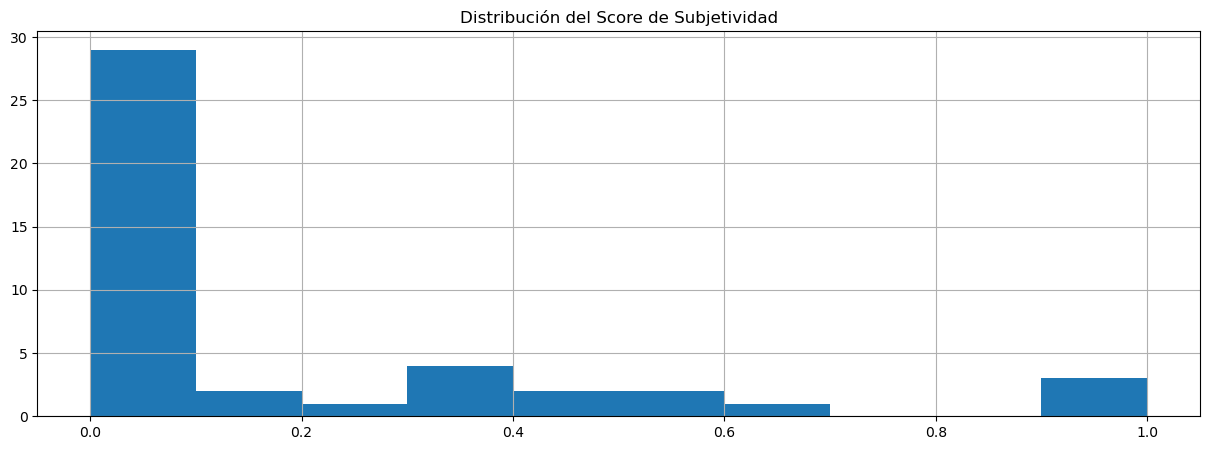

In [102]:
#Se genera el gráfico
df_detractores['Subjetividad'].hist()
plt.title('Distribución del Score de Subjetividad')

Viendo el Score de Subjetividad (que muestra la cantidad de opinión personal, si una oración tiene alta subjetividad mientras más cercano es a 1) se puede apreciar que la mayoría de comentarios son objetivos, más que una opinion personal.

Viendo los comentarios negativos:

In [109]:
df_detractores[df_detractores['Polaridad']=='negativo']['NPS total Comentarios'].values[1]

'NO SE SI ES SOLO LAPROTECTORA O TODOS LOS DEMÁS SEGUROS, NO ME PUEDO HACERME VER TODAVIA, PORQUE DEBO PASAR UN PERIODO DE CARENCIA COMO DE 10 MESES PARA ATENDERME, SOLO CUALQUIER EMERGENCIA QUE TENGA NOS PUEDEN VER, PERO SINO LOS PRIMEROS 10 MESES VOY A PAGAR EL SEGURO CASI 1 AÑO Y NO LO VOY A PODER USAR, NO ME PARECE, NO SE SI SEA SOLO DE LAPROTECTORA, PERO ME PARECE TERRIBLE. SER UN POCO MAS EMPATICOS EN PERSONAS QUE DECIDEN CONTAR Y ADQUIRIR EL SEGURO LAPROTECTORA Y NO PONER PERIODOS TAN EXTENSOS, PORQUE PRACTICAMENTE LO QUE ESTAN HACIENDO ES HACERNOS PAGAR CASI UN AÑO SIN USAR EL SEGURO'

In [108]:
df_detractores[df_detractores['Polaridad']=='negativo']['NPS total Comentarios'].values[0]

'SUCEDE QUE CUANDO ADQUIRÍ, YO SI HE UTILIZADO LAPROTECTORA ANTES COMO EPS POR PARTE DE MI TRABAJO, Y ME HE ATENDIDO ALGUNOS DOLORES DE ESPALDA DEBIDO A LOS DEPORTES QUE YO PRACTICO DE MANERA AMATEUR Y RESONANCIA Y TODO EL TEMA, NO SALIA NINGÚN TIPO DE PROBLEMA MAYOR EN MI ORGANISMO EN MI CUERPO, PERO AHORA QUE ADQUIRÍ EL SEGURO HACE 6 MESES DE MANERA PRIVADA POR MI CUENTA, NO SIN TENER DE INTERMEDIARIO A MI EMPLEADOR INDIQUE NO TENIA NINGUNA ENFERMEDAD O ALGO QUE PUEDA SER CLASIFICADO COMO UNA EXCLUSIÓN, SE TOMO MI PALABRA LUEGO CUANDO LLEGO MI POLIZA Y SE ME IBA A COBRAR EL PRIMER MES, ESTE HICE UN RECLAMO ME HABÍAN PUESTO LA EXCLUSIÓN DE CUALQUIER DOLOR DE ESPALDA INCLUSO HABIAN PUESTO EXCLUSIONES PARA DOLOR DE NERVIOS Y SIN NINGUN MOTIVO, OSEA SOLO POR HABERME ATENDIDO ANTERIORMENTE EN BASE A ESA ENFERMEDAD ES COMO SI ME HUBIERA ACERCADO POR UNA GRIPE Y AHORA YA NO TENGO COBERTURA POR GRIPES MAS ADELANTE, ENTONCES NO TIENE NINGUN SENTIDO, PORQUE NO TIENE NINGÚN ARGUMENTO NINGUNA EV

Vemos que las principales quejas son los altos periodos de carencia y el tema de exclusiones cuando se contrata directamente el seguro

#### Recomendaciones

Entre lo más comentado por parte de los detractores se pueden incluir objetivos a tomar en cuenta para reducir la cantidad de estos supliendo sus insatisfacciones:
1. Brindar facilidades en cuanto a movilidad y traspasos de clínica
2. Mejorar los procesos en cuanto la determinación de fechas o establecer una aplicación con función de calendario
3. Mejorar y recolectar información específica sobre la atención de médicos a domicilio
4. Establecer distintos paquetes e informar con mayor claridad lo que contiene cada uno
5. Un sistema unificado donde los informes sean dados por el mismo médico
6. Establecer una atención personalizada a partir de los perfiles de las personas